In [150]:
import requests 
import json
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
%cd
%pwd
grey_shade  = '0.75'

C:\Users\Joseph Bedford


In [141]:
config = pd.read_csv('~\Documents\Sams dashboard\Brocklesby_farm\config.csv',
                     dtype = {0: str, 1: str, 2: np.float64, 3: bool, 4: str, 5:np.float64, 6:np.float64})
config['sales_date'] = pd.to_datetime(config.sales_date, infer_datetime_format=True)

In [142]:
crops = config.crop.drop_duplicates().tolist()
chosen_crop = crops[0]

In [143]:
filtered_config = config[config.crop == chosen_crop]
market_id = filtered_config.market_id.drop_duplicates().reset_index(drop = True)[0]

In [144]:
url = 'https://www.theice.com/marketdata/DelayedMarkets.shtml?getHistoricalChartDataAsJson=&marketId='+market_id+'&historicalSpan=3'

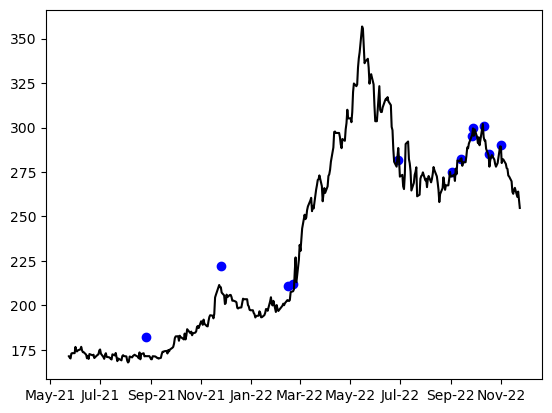

In [154]:
r = requests.get(url)
js = r.json()

listo1 = []
listo2 = []

for i in js['bars']:
    listo1.append(i[0])
    listo2.append(i[1])

dict1 = dict(zip(pd.to_datetime(listo1, format = '%a %b %d %H:%M:%S %Y'),listo2))

#target_key = st.date_input("sale date", pd.to_datetime('2021-09-14 00:00:00'))
#target_key1 = pd.to_datetime(target_key)
#print(type(target_key1))

fig, ax = plt.subplots()
ax.plot(dict1.keys(), dict1.values(), c = 'black')

ax.scatter(filtered_config.sales_date, filtered_config.sales_price, marker='o', c="blue")
myFmt = mdates.DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(myFmt)


In [146]:
filtered_config

,market_id,crop,total_crop_tonnage,total_crop_tonnage_is_estimate,sales_date,sales_tonnage,sales_price
0,6685627,Feed Wheat,12072.58,False,2021-08-26,203.0,182.0
1,6685627,Feed Wheat,12072.58,False,2021-11-25,522.0,222.0
2,6685627,Feed Wheat,12072.58,False,2022-02-15,232.0,211.0
3,6685627,Feed Wheat,12072.58,False,2022-02-21,232.0,212.0
4,6685627,Feed Wheat,12072.58,False,2022-06-29,203.0,282.0
5,6685627,Feed Wheat,12072.58,False,2022-09-02,203.0,275.0
6,6685627,Feed Wheat,12072.58,False,2022-09-13,290.0,282.5
7,6685627,Feed Wheat,12072.58,False,2022-09-27,290.0,295.0
8,6685627,Feed Wheat,12072.58,False,2022-09-28,406.0,300.0
9,6685627,Feed Wheat,12072.58,False,2022-10-11,203.0,301.0


In [147]:
latest_total_crop_tonnage = filtered_config[filtered_config.sales_date == max(filtered_config.sales_date)].total_crop_tonnage.reset_index(drop = True)[0]
latest_is_estimate_flag = filtered_config[filtered_config.sales_date == max(filtered_config.sales_date)].total_crop_tonnage_is_estimate.reset_index(drop = True)[0]
total_sales_tonnage = filtered_config.sales_tonnage.sum()
remaining_tonnage_to_sell = latest_total_crop_tonnage - total_sales_tonnage

total_sales_avg_price = np.average(filtered_config.sales_price, weights=filtered_config.sales_tonnage)
filtered_config

False

In [127]:
0.5 * (1 / filtered_config.shape[0])

0.041666666666666664

(18743.55, 19347.45)

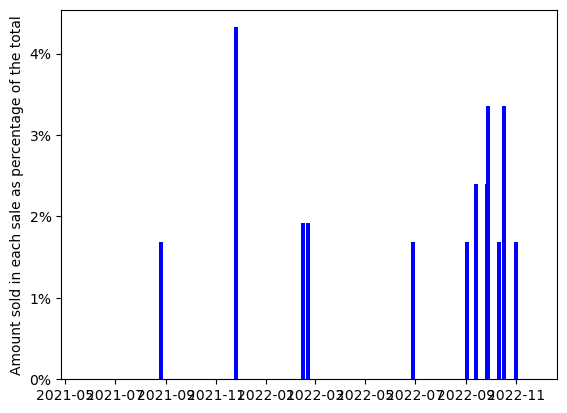

In [149]:
percentage_of_total_sold = 100*filtered_config.sales_tonnage/latest_total_crop_tonnage
#width = 0.9

fig_b, ax_b = plt.subplots()
ax_b.bar(filtered_config.sales_date,percentage_of_total_sold, width = 5, color = 'blue')
#ax_b.bar(filtered_config.sales_date,100-percentage_of_total_sold,width = 5, bottom=percentage_of_total_sold, color = grey_shade)
ax_b.set_ylabel('Amount sold in each sale as percentage of the total')#note that a width of 1.0 is 1 day
ax_b.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=False))
ax_b.set_xlim(ax.get_xlim())


([<matplotlib.patches.Wedge at 0x1e6442ff730>,
 [Text(0.6983664320255784, 0.8498731238366486, 'Average sales price (£262/t)'),
  Text(-0.6983663524547109, -0.849873189222429, 'Remaining tonnage to sell (8679t)')])

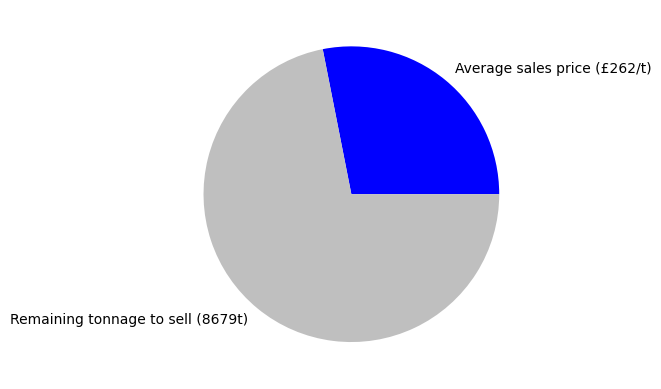

In [110]:
pie_chart_values = list([total_sales_tonnage, 
                         remaining_tonnage_to_sell])


pie_chart_labels = list(['Average sales price (£'+str(int(total_sales_avg_price))+'/t)',
                        'Remaining tonnage to sell ('+str(int(remaining_tonnage_to_sell))+'t)'])

fig_p, ax_p = plt.subplots()

ax_p.pie(pie_chart_values, labels = pie_chart_labels, colors = ['blue', grey_shade]) #greyshade colour

